<h2>Assumptions Check</h2>
<h3>Normality, collinearity and singularity</h3>

<br>(c) Marie-Eve Picard, Maude Picard, Andreanne Proulx, 2021

<b>Description</b>
<br>This script can be used to verified:
<ul><li>Accuracy of the dataset</li>
<li>Normality</li>
<li>Collinearity</li></ul>
<br>Steps for assumptions check are based on Tabachnick & Fidell, 2018

In [202]:
#import required modules
import pandas as pd 
import numpy as np
import scipy
import pyreadstat
import scipy.stats as stats
import matplotlib
import factor_analyzer
from matplotlib import pyplot as plt 
%matplotlib inline
#from statsmodels.graphics.gofplots import qqplot
from scipy.spatial.distance import mahalanobis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OrdinalEncoder
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


In [203]:
pwd

'/Users/Paul-Emile Jennevin/Code/Git/PSY-6002/scripts'

In [204]:
#set pandas option so that we can see the entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

<b>Import the dataset</b>

In [205]:
#Change the file_name variable with / (and not \)
#Make sure any type of missing value can be identify

#file_name = 'C:/Users/mepic/OneDrive/Documents/Master/PSY6002/TP/donnees_tp1_v2.sav'  # Change path to dataset

file_name = "/Users/Paul-Emile Jennevin/Code/Git/PSY-6002/donnees_tp1_v2.sav"
missing_values = ["n/a","na","--"]
file_extension = file_name.split(".",1)[1]

#if file_extension == 'csv':
#    df = pd.read_csv(file_name, na_values = missing_values)
#elif file_extension == 'xlsx':
#    df = pd.read_excel(file_name, na_values = missing_values)
#elif file_extension == ".sav":
df = pd.read_spss(file_name)

<b>Accuracy of Data File</b>
<br>Check for possible duplicated rows

In [206]:
#Overview of the dataset
df.head()

,Sujet,Genre,Age,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,1.0,Masculin,15.0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,2.0,Masculin,15.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,3.0,Féminin,14.0,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,Féminin,14.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,5.0,Féminin,14.0,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [207]:
#Overview of the dataset
df.columns

Index(['Sujet', 'Genre', 'Age', 'MA1001', 'MA1012r', 'MA1023', 'MA1034r',
       'MA1045', 'MA1056r', 'MA1067', 'MA1078r', 'MA1089', 'MA1096r', 'PH2005',
       'PH2027', 'PH2049', 'PH2071', 'ph2016r', 'ph2038r', 'ph2060r',
       'ph2082r', 'VE1006r', 'VE1017', 'VE1028r', 'VE1039', 'VE1050r',
       'VE1061', 'VE1072r', 'VE1083', 'VE1092r', 'VE1099', 'SS1009', 'SS1031',
       'SS1053', 'SS1075', 'SS1094', 'ss1020r', 'ss1042r', 'ss1064r',
       'ss1086r', 'ss1101r'],
      dtype='object')

In [208]:
#Change the dataframe to include only the targeted variables
#In this case, remove Sujet, Genre and Age columns
df_tp = df.drop(df.columns[[0 , 1 , 2]], axis = 1)
df_tp.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [209]:
# Encode label value to ordinal values

# list all possible labels values
#labels = df["MA1001"].unique()

#labels = ["faux","plutot faux","plus faux que vrai","plus vrai que faux","plutot vrai", "vrai"]

#i = 1
#for column in df_tp.columns:
#    for i , label in zip(range(1,7), labels):
#        df_tp[column] = df_tp[column].replace(label, i)
    
#    i+=1
    
#df_tp = df_tp.astype(float)
#df_tp.head()

In [210]:
#Identify categorical variables when needed
#categ_var:= list of the categorical variables (df columns name)
#ex: if df.columns -> 'name', 'education', 'score1', 'score2'; the arguments in the identif_categ function will be in the form of ['name', 'education']

#def identif_categ(categ_var): 
#    for i in range (len(categ_var)):
#        df_tp[categ_var[i]] = df_tp[categ_var[i]].astype('object')

In [211]:
#Args := list of categorical columns (String)
#identif_categ(["MA1001", "MA1023", "MA1045", "MA1067", "MA1089", "PH2005", "PH2027", "PH2049", "PH2071", "VE1017", "VE1039", "VE1061", "VE1083", "VE1099", "SS1009", "SS1053",  "SS1031", "SS1075", "SS1094"])

In [212]:
#dataframe with only continuous variables
df_continuous = df_tp.select_dtypes(exclude = ['object'])
df_continuous.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


<b>Descriptive Stats with the original dataset (including missing values)</b>
<ul><li>Mean & std</li>
<li>Min & Max</li>
<li>Number of missing</li>
<li>Skewness & Kurtosis</li></ul>

In [213]:
## Number of participants

print ("Total number of participants is : " + str(len(df_tp)))

Total number of participants is : 625


In [214]:
#Descriptive stats for continuous variables (count, mean, std, min/max, quartiles, missing values). 
# Include = 'all' -> to check if there are missing values also for categorical variables
#To read .sav files, make sure -> pip install pyreadstat

des1 = df_tp.describe(include = 'all')
des2 = df_tp.isnull().sum().to_frame(name = 'missing').T
df_des = pd.concat([des1, des2])
df_des

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
count,619.000000,617.000000,618.000000,616.000000,613.000000,620.000000,620.000000,616.000000,616.000000,619.000000,614.000000,619.000000,617.000000,621.000000,619.000000,615.000000,621.000000,619.000000,620.000000,620.000000,620.000000,616.000000,619.000000,619.000000,619.000000,619.000000,619.000000,620.000000,620.000000,618.000000,618.000000,614.000000,616.000000,618.000000,615.000000,617.000000,620.000000,620.000000
mean,3.583199,3.627229,2.380259,4.003247,2.166395,3.993548,3.758065,4.375000,3.569805,3.567044,4.617264,4.495961,3.755267,3.900161,4.655897,4.609756,5.024155,5.048465,4.106452,2.569355,4.096774,3.712662,4.268174,3.226171,3.893376,3.882068,4.155089,4.027419,2.856452,4.574434,4.001618,4.197068,4.116883,4.606796,4.565854,4.581848,4.535484,4.454839
std,1.670448,1.772015,1.445744,1.643906,1.376167,1.611737,1.619604,1.697619,1.656227,1.790829,1.559613,1.520486,1.542707,1.597281,1.491999,1.493930,1.428194,1.358508,1.588007,1.484447,1.526393,1.470657,1.556635,1.715311,1.843805,1.492371,1.516421,1.443908,1.420041,1.465473,1.324864,1.249571,1.351653,1.463467,1.378690,1.343646,1.342856,1.334115
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,4.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,4.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
missing,6.000000,8.000000,7.000000,9.000000,12.000000,5.000000,5.000000,9.000000,9.000000,6.000000,11.000000,6.000000,8.000000,4.000000,6.000000,10.000000,4.000000,6.000000,5.000000,5.000000,5.000000,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,7.000000,7.000000,11.000000,9.000000,7.000000,10.000000,8.000000,5.000000,5.000000


In [215]:
#Compute % of missing values
nb_missing = df_des.loc['missing', : ].sum()
nb_tot = len(df_tp[df_tp.columns[0]]) * len(df_tp.columns)
print("% missing data: ", 100*nb_missing/nb_tot)

% missing data:  1.111578947368421


In [216]:
df_tp.shape

(625, 38)

<b>Skewness & Kurtosis</b>

In [217]:
#calculate skewness
df_skew = df_tp.skew(axis = 0, skipna = True)

print(df_skew.shape)

df_skew = pd.DataFrame({'VI': df_skew.index, 'Value': df_skew.values})
print(df_skew)

(38,)
         VI     Value
0    MA1001 -0.096437
1   MA1012r -0.148379
2    MA1023  0.782279
3   MA1034r -0.423821
4    MA1045  1.113721
5   MA1056r -0.454028
6    MA1067 -0.306995
7   MA1078r -0.808725
8    MA1089 -0.133841
9   MA1096r -0.139475
10   PH2005 -0.973525
11   PH2027 -0.891452
12   PH2049 -0.176365
13   PH2071 -0.343704
14  ph2016r -0.887436
15  ph2038r -1.001280
16  ph2060r -1.498974
17  ph2082r -1.564263
18  VE1006r -0.481315
19   VE1017  0.655379
20  VE1028r -0.434436
21   VE1039 -0.246066
22  VE1050r -0.558079
23   VE1061  0.155382
24  VE1072r -0.318346
25   VE1083 -0.444955
26  VE1092r -0.501622
27   VE1099 -0.393652
28   SS1009  0.322828
29   SS1031 -0.898773
30   SS1053 -0.489628
31   SS1075 -0.704260
32   SS1094 -0.677098
33  ss1020r -0.966274
34  ss1042r -0.968081
35  ss1064r -0.890119
36  ss1086r -0.885056
37  ss1101r -0.795628


In [218]:
#print min and max skewness values with the corresponding variables
print(df_skew.loc[df_skew['Value']==min(df_skew['Value']), 'VI'], "Score min skewness: ", min(df_skew['Value']), "\n", df_skew.loc[df_skew['Value']==max(df_skew['Value']), 'VI'], "Score max skewness: ", max(df_skew['Value']))

17    ph2082r
Name: VI, dtype: object Score min skewness:  -1.564262507353709 
 4    MA1045
Name: VI, dtype: object Score max skewness:  1.113721263583358


In [219]:
#Calculate kurtosis
df_kurtosis = df_tp.kurtosis(axis = 0, skipna = True)
df_kurtosis = pd.DataFrame({'VI': df_kurtosis.index, 'Value': df_kurtosis.values})
print(df_kurtosis)

         VI     Value
0    MA1001 -1.133959
1   MA1012r -1.310943
2    MA1023 -0.414935
3   MA1034r -1.008112
4    MA1045  0.412055
5   MA1056r -0.898595
6    MA1067 -1.049520
7   MA1078r -0.605651
8    MA1089 -1.177056
9   MA1096r -1.316010
10   PH2005 -0.182872
11   PH2027 -0.175145
12   PH2049 -1.004780
13   PH2071 -0.977036
14  ph2016r -0.306934
15  ph2038r  0.015142
16  ph2060r  1.230690
17  ph2082r  1.641583
18  VE1006r -0.816748
19   VE1017 -0.564117
20  VE1028r -0.837755
21   VE1039 -0.833375
22  VE1050r -0.812985
23   VE1061 -1.209300
24  VE1072r -1.328264
25   VE1083 -0.686343
26  VE1092r -0.792653
27   VE1099 -0.705325
28   SS1009 -0.850784
29   SS1031 -0.122198
30   SS1053 -0.371680
31   SS1075  0.238609
32   SS1094 -0.089204
33  ss1020r  0.036152
34  ss1042r  0.297846
35  ss1064r  0.099940
36  ss1086r  0.107179
37  ss1101r  0.087681


In [220]:
#print min and max kurtosis values with the corresponding variables
print(df_kurtosis.loc[df_kurtosis['Value']==min(df_kurtosis['Value']), 'VI'], "Score min kurtosis: ", min(df_kurtosis['Value']), "\n", df_kurtosis.loc[df_kurtosis['Value']==max(df_kurtosis['Value']), 'VI'], "Score max kurtosis: ", max(df_kurtosis['Value']))

24    VE1072r
Name: VI, dtype: object Score min kurtosis:  -1.328263896599167 
 17    ph2082r
Name: VI, dtype: object Score max kurtosis:  1.6415829088811953


<b>Z scores (univariate outliers)</b>

In [221]:
#Create an empty new dataframe for zscores
columns_name = df_tp.columns
df_zscores = pd.DataFrame(columns = columns_name)

In [222]:
#Calculate z scores(univariate outliers) for all variables
i=0
while i < len(df_continuous.columns):
    if df_tp.columns[i] == df_zscores.columns[i]:
        df_zscores[df_zscores.columns[i]] = stats.zscore(df_tp[df_tp.columns[i]], nan_policy='omit') # nan policy not avail with scipy version
        i+=1
    else:
        print('error')
        break

In [223]:
#overview of the zscores dataframe
df_zscores.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,0.249716,0.210537,-0.263233,1.215626,0.606239,0.004006,0.149500,0.958001,0.259955,0.241959,0.887312,0.989983,1.456242,0.689125,0.901603,0.931353,0.683823,0.700993,-1.327546,-0.383856,-0.719120,-1.846023,0.470513,-1.298873,-1.570511,-1.262146,0.557625,-2.098378,-0.603604,0.290630,-1.512034,-1.759692,-1.567416,0.268897,-1.136679,-1.178235,-0.399087,-0.341204
1,0.848842,1.340111,1.813504,1.215626,2.060737,1.245905,0.767433,0.958001,0.864228,1.359663,0.245605,0.331767,0.158767,0.062556,0.901603,0.931353,0.683823,0.700993,0.563140,-1.058052,0.592216,-1.165503,1.113444,-1.298873,1.143466,-1.932763,0.557625,-1.405254,0.805943,-2.441075,0.754183,0.643090,0.653891,0.952760,0.315154,0.311460,0.346196,0.408961
2,0.848842,1.340111,0.429013,1.215626,0.606239,1.245905,0.767433,0.958001,-0.344318,1.359663,0.245605,0.331767,0.807504,1.315693,0.901603,0.931353,0.683823,0.700993,1.193368,1.638730,1.247884,1.556581,1.113444,1.034951,1.143466,0.749704,1.217606,1.367244,2.215490,0.973557,1.509589,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
3,0.249716,0.210537,0.429013,0.606825,2.060737,0.624956,0.767433,0.958001,0.864228,0.800811,-1.679518,0.331767,1.456242,1.315693,0.901603,0.261432,0.683823,0.700993,1.193368,0.290339,1.247884,1.556581,1.113444,0.451495,1.143466,0.749704,1.217606,0.674119,0.101169,0.290630,0.754183,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
4,1.447968,1.340111,1.813504,1.215626,0.606239,1.245905,1.385367,0.958001,0.259955,1.359663,-0.396103,-0.326450,-1.787445,0.062556,-0.439965,0.261432,-0.717676,-0.772401,0.563140,0.290339,0.592216,0.876060,0.470513,-0.131961,1.143466,1.420321,-1.422317,0.674119,0.805943,0.290630,1.509589,1.444017,1.394327,0.952760,1.041071,1.056307,1.091479,1.159127


In [224]:
#Return index and columns where the zscore > 3.29, if no |zscores| > 3.29 in the entire dataframe: "no value exceeding 3.29"
ls_outliers=[]
for i in range(len(df_zscores.columns)):
    if df_zscores.loc[np.abs(df_zscores[df_zscores.columns[i]]) > 3.29].empty == False:
        df_zscores.loc[df_zscores[df_zscores.columns[i]] > 3.29]
        ls_outliers.append(True)

if len(ls_outliers) == 0:
    print("no zscores exceeding 3.29")

no zscores exceeding 3.29


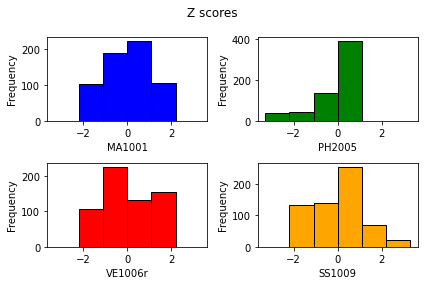

In [225]:
#Z scores histograms for MA1001, PH2005, VE1006r, SS1009
var_interest = ['MA1001','PH2005','VE1006r','SS1009']
ls_color = ['blue', 'green', 'red', 'orange']

for i in range (len(var_interest)):
    plt.subplot(2,2,i+1)
    plt.hist(df_zscores[var_interest[i]], color = ls_color[i], edgecolor = 'black',bins = 6,range=(-3.29,3.29))
    plt.suptitle('Z scores')
    plt.xlabel(var_interest[i])
    plt.ylabel('Frequency')
    plt.tight_layout()

<b>Bivariate relationship linearity</b>

In [226]:
#Create a 2D list of variables to compared
#6 comparisons:
#MA1001 vs PH2005
#MA1001 Vs VE1006r
#MA1001 vs SS1009
#PH2005 vs VE1006r
#PH2005 vs SS1009
#VE1006r vs SS1009

ls_bivar_plot = [['MA1001','MA1001', 'MA1001','PH2005','PH2005','VE1006r'],['PH2005', 'VE1006r', 'SS1009','VE1006r','SS1009','SS1009']]

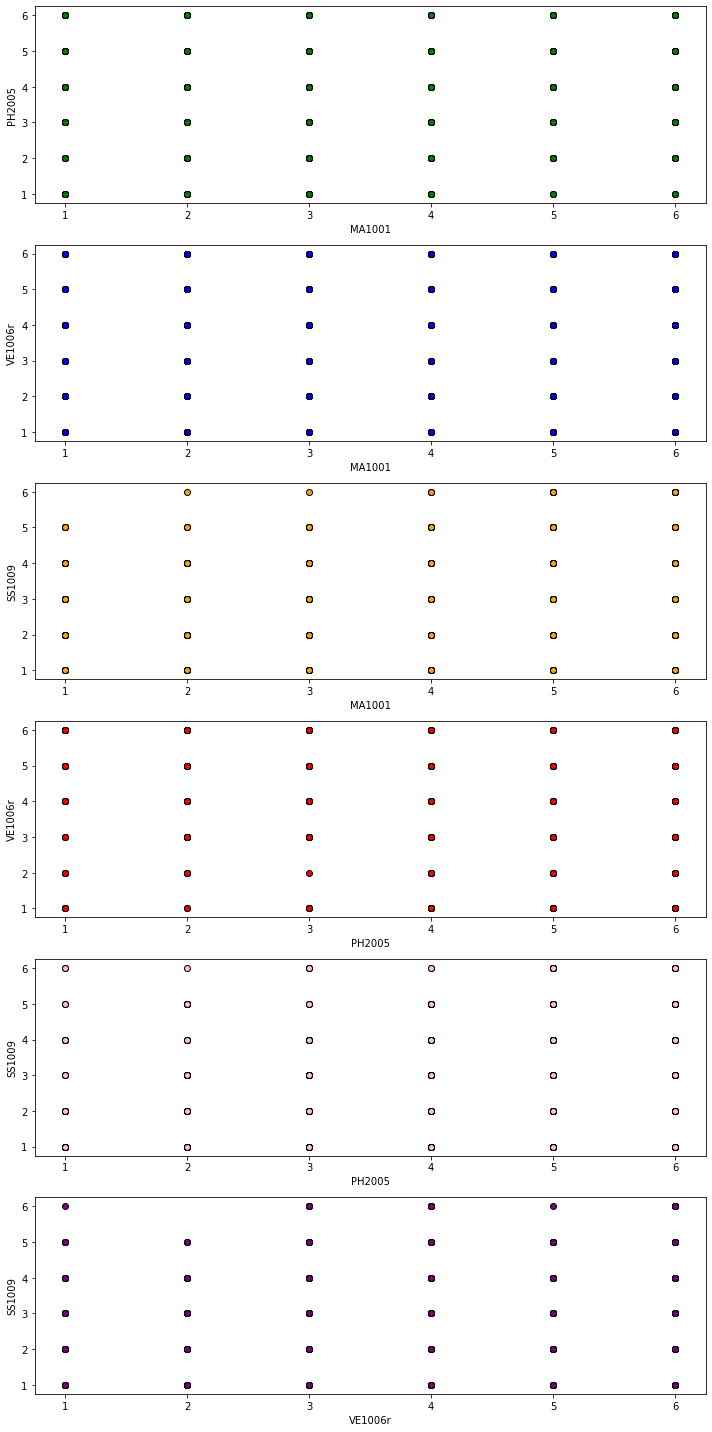

In [227]:
nb_comp = 6
fig, ax = plt.subplots(figsize=(10,20))
ls_c = ['green','blue','orange','red','pink','purple']

for i in range(nb_comp):
    plt.subplot(6,1,i+1)
    x_plot = ls_bivar_plot[0][i]
    y_plot = ls_bivar_plot[1][i]
    plt.scatter(df_tp[x_plot], df_tp[y_plot], c = ls_c[i], edgecolors = 'black' )
    plt.xlabel(x_plot)
    plt.ylabel(y_plot)
    plt.tight_layout()


<b>Multivariate outliers</b>
<br>For TP1 only MA1001, PH2005, VE1006r and SS1009 will be tested for normality assumptions 

In [228]:
#Create dataframe without missing values
df_dropna = df_tp.dropna()

In [229]:
#Calculate multivariate outliers (mahalanobis distance)
#https://www.machinelearningplus.com/statistics/mahalanobis-distance/

def mahalanobis_outliers(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    return md

df_mahal = df_dropna[['MA1001','PH2005','VE1006r','SS1009']]
df_mahal['mahal'] = mahalanobis_outliers(x = df_mahal, data = df_dropna[['MA1001','PH2005','VE1006r','SS1009']])
df_mahal.head(50)

<ipython-input-229-0cb1c759642f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mahal['mahal'] = mahalanobis_outliers(x = df_mahal, data = df_dropna[['MA1001','PH2005','VE1006r','SS1009']])


,MA1001,PH2005,VE1006r,SS1009,mahal
0,4.0,6.0,2.0,2.0,1.688988
1,5.0,5.0,5.0,4.0,1.132817
2,5.0,5.0,6.0,6.0,2.389980
3,4.0,2.0,6.0,3.0,2.155740
4,6.0,4.0,5.0,4.0,1.697385
5,1.0,1.0,6.0,1.0,3.055199
6,3.0,2.0,3.0,3.0,2.023723
7,4.0,6.0,3.0,4.0,1.446529
8,1.0,6.0,3.0,1.0,2.124374
9,1.0,6.0,6.0,2.0,2.186498


In [230]:
#Compute critical Chi2 value 
dfreedom = len(var_interest) - 1
signlevel = 0.01
chi_critic = stats.chi2.ppf((1-signlevel), df = dfreedom)
chi_critic

11.344866730144373

In [231]:
#Test if mahalanobis distance > critical chi
for i in range (len(df_mahal['mahal'])):
    try:
        if df_mahal['mahal'][i] > chi_critic:
            print(i)
    except:
        pass

<b>Multicollinearity & Singularity</b>
<br>VIF -> strength of the correlation between VIs

In [232]:
#Code from:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
#Add a constant to the dataframe
df_constant = add_constant(df_dropna)

#Create a dataframe
vif_data = pd.DataFrame()
vif_data['Features'] = df_constant.columns
#Compute VIF for each IVs
vif_data['VIF'] = [variance_inflation_factor(df_constant.values, i) for i in range(len(df_constant.columns))]

print(vif_data)

   Features        VIF
0     const  44.470267
1    MA1001   4.645117
2   MA1012r   4.517904
3    MA1023   2.522463
4   MA1034r   3.555179
5    MA1045   1.794249
6   MA1056r   3.943988
7    MA1067   4.753229
8   MA1078r   1.982331
9    MA1089   3.676130
10  MA1096r   2.652681
11   PH2005   2.172180
12   PH2027   2.979575
13   PH2049   2.144046
14   PH2071   1.598443
15  ph2016r   1.944914
16  ph2038r   2.205183
17  ph2060r   1.912932
18  ph2082r   2.606851
19  VE1006r   2.382360
20   VE1017   1.908372
21  VE1028r   2.117178
22   VE1039   3.308328
23  VE1050r   2.014356
24   VE1061   3.337248
25  VE1072r   1.547188
26   VE1083   3.805453
27  VE1092r   1.273954
28   VE1099   3.834108
29   SS1009   1.659525
30   SS1031   1.327103
31   SS1053   2.547548
32   SS1075   3.484388
33   SS1094   3.395910
34  ss1020r   2.299870
35  ss1042r   3.249078
36  ss1064r   3.797424
37  ss1086r   3.286649
38  ss1101r   3.082910


##### To do


2) La méthode de rotation et sa justification
3) L’étendue des saturations obtenues et des saturations croisées obtenues ainsi que le critère utilisé pour les départager
4) Le pourcentage de variance expliquée par les facteurs 
5) Le pourcentage de résiduels supérieurs à .05 entre la matrice de corrélations réelles et reproduites 


In [233]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### Factorability 

#### KMO 

In [234]:
df = df_tp.dropna()

In [235]:
kmo_all,kmo_model=calculate_kmo(df)
print ("kmo score : " + str(kmo_model))

# 0,94 : adequate for factor analysis, des valeurs au-dessus de .6 sont requises.  (Tabachnick & Fidel, 2013; au-dessus de .5 selon Williams, Onsman & Brown, 2010 

kmo score : 0.9406666321035712


#### Test de Barlett

In [236]:
# Berlett test
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

print ("pval: " + str(p_value))
# différence entre matrice de corrélation et matrice d'identité doit être significative, ici pval est de 0.0 donc significatif

pval: 0.0


### Correlation matrix


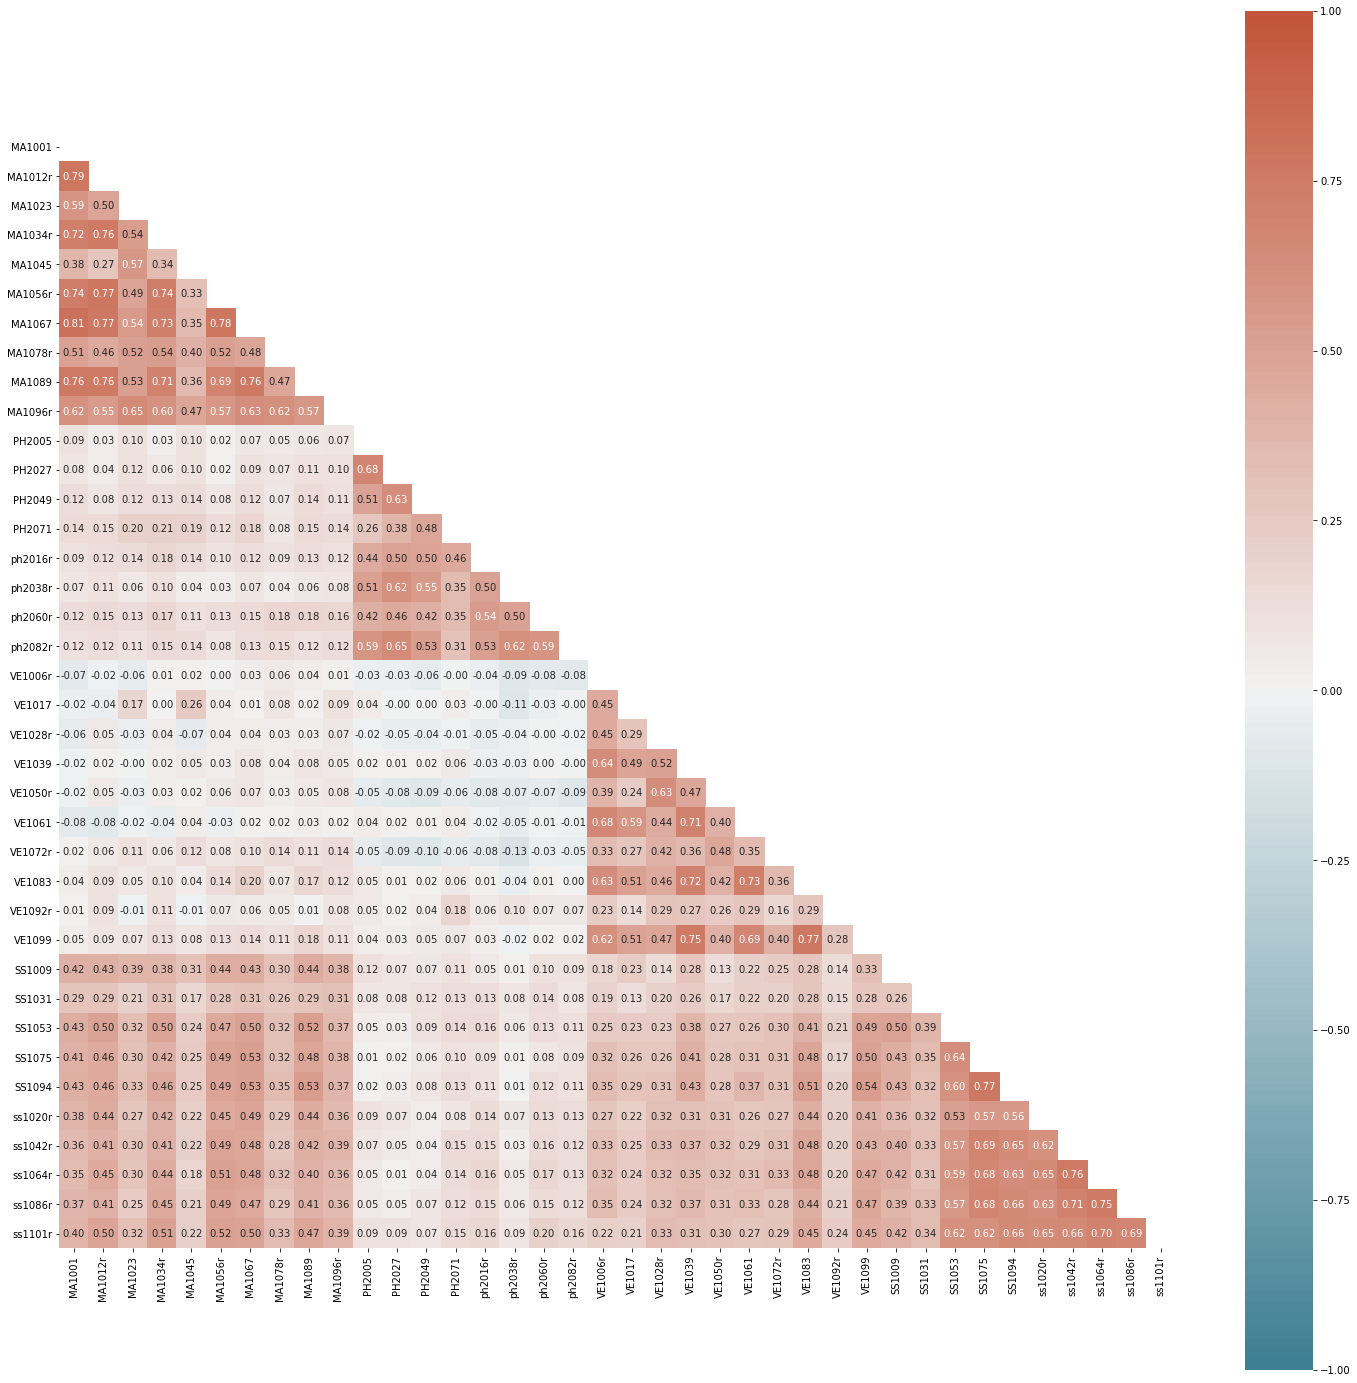

In [237]:
### Plot correlation matrix 
import seaborn as sns

plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(correlation_matrix, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

In [238]:
columns = correlation_matrix.columns

In [239]:
# check if at least one value > 0.30
bool_corr = correlation_matrix > 0.30
bool_corr

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
MA1001,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1012r,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1023,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True
MA1034r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
MA1045,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
MA1056r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1067,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
MA1078r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True
MA1089,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1096r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True


### Determinant of correlation matrix

In [240]:
x_corr = df.corr()
corr_det = np.linalg.det(x_corr)

corr_det  #

# Le coefficient devrait être plus grand que .00001, mais ici il est plus petit.
#Ici, le déterminant est très petit pcq mesure tous estime de soi. Mais pas surprenant, simplement le mentionner dans la discussion. C'est une limitation. .

2.2744984999326684e-12

### Communalities (moyenne des représentations initiales)

In [241]:
# initial : square the multiple correlation coefficient of manifest variables with other variables 
import statsmodels.api as sm
r2 = []

for col in df.columns :
    
    X = df.loc[ : , df.columns != col]
    y = pd.DataFrame({col:df[col]})
    
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()

    rsquared = results.rsquared
    r2.append(rsquared)
  
repr_quality = pd.DataFrame()
repr_quality ["variable"] = df.columns 
repr_quality ["communalities"] = r2 

repr_quality

,variable,communalities
0,MA1001,0.784720
1,MA1012r,0.778658
2,MA1023,0.603562
3,MA1034r,0.718720
4,MA1045,0.442664
5,MA1056r,0.746450
6,MA1067,0.789617
7,MA1078r,0.495543
8,MA1089,0.727975
9,MA1096r,0.623023


In [242]:
# moyenne de la qualité des représentation
print( "moyenne des représentation initiales/ " + str(repr_quality.mean()))

# La qualité de la représentation est < 0.7 , McCallum et al., 1999 , mais elle est au moins > 0.20. Pour le tp kmo > 0.30, donc ok. 

moyenne des représentation initiales/ communalities    0.592499
dtype: float64


### Méthode d'extraction et justification

In [243]:
# methods : ML or PAF

### ML : étant donné le postulat de normalité varié, donne moins de poids au items plus faible, considère erreur échantillonage  
### PAF : 

#### Critère de Kaiser

In [244]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None, method='ml')
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

df_ev = pd.DataFrame(data = ev).rename(columns = {0: "eigenvalues"})
df_ev.index = df_ev.index + 1
df_ev

,eigenvalues
1,11.419018
2,5.568473
3,4.122120
4,1.658422
5,1.177944
6,1.086994
7,0.979748
8,0.814196
9,0.785178
10,0.777798


In [245]:
# Critère de Kaiser:  factors greater than 1. However note it tends to overextract the number of factors

nb_factors = df_ev[df_ev['eigenvalues'] < 1].index[0]-1
print ("The maximum number of factors (eigenvalues larger than 1) is  " + str(nb_factors))

The maximum number of factors (eigenvalues larger than 1) is  6


In [246]:
# sharp breaks in size of eigenvalues are sought using the scree test 

#### Test coude Cattell

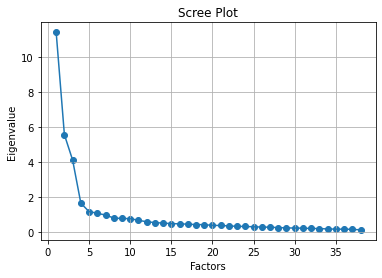

In [247]:
# Now let's take a look at the Catell Scree Plot

# plot
plt.scatter(range(1,df_tp.shape[1]+1),ev)
plt.plot(range(1,df_tp.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# keep factors before inflexion point:
# Eigenvalues for the first four factors are larger, and, after the fourth factor, changes in successive eigenvalues are small. 
# This is taken as evidence that there are probably between four and six factors. The scree plot visually suggests breaks between four factors. 
# Results from scree plot are consistent with earlier research suggesting four factors on the questionnaire.

# Note scree plot is more subjective. We will look at solutions for [4,5,6] factors to decide upon best n factors. 

In [248]:
# Find optimal number of factors by checking loadings + residuals, communalities ?

# Communalities are inspected to see if the variables are well defined by the solution. Communalities indicate the percent of variance in a variable that overlaps variance in the factors. 

# METHODS

# fa.get_communalities()
# fa.get_factor_variance()
# fa.get_uniquenesses()


### Pick n factors

In [249]:
n_factors = [4, 5, 6]

#### 6 factors

In [250]:
# Check loading & communalities for all possible n factors

fa = FactorAnalyzer(n_factors = n_factors[2], rotation=None, method='ml')
fa.fit(df)

communalities = pd.DataFrame(fa.get_communalities())# get proportion de variance expliquée par les facteurs
df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[2]+1)], index = df.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

# drop variables with low communalities, for example, exclude those variables with <0.2 communalities. 
# Here only one variable < 0.2. Are there other things that should be checked??

#df_residuals = pd.DataFrame(fa.loadings_)
#df_uniqueness = pd.DataFrame (fa.get_uniquenesses)
#df_communalities = pd.DataFrame (fa.get_communalities())
#df_factor_variance = pd.DataFrame (fa.get_factor_variance)
#check if saturations > 1 : si oui problème Heywood case
# conclusion

           0
0   0.815332
1   0.810485
2   0.688006
3   0.704382
4   0.508851
5   0.740962
6   0.796748
7   0.454400
8   0.729645
9   0.642991
10  0.530153
11  0.693658
12  0.537518
13  0.259578
14  0.469700
15  0.593654
16  0.442074
17  0.639718
18  0.570205
19  0.479487
20  0.660197
21  0.733496
22  0.590385
23  0.728308
24  0.351208
25  0.752838
26  0.155168
27  0.756512
28  0.352696
29  0.210913
30  0.553333
31  0.686839
32  0.672293
33  0.558510
34  0.712136
35  0.766442
36  0.710897
37  0.673440
Total variables with communalities > 0.3 :35



,fa1,fa2,fa3,fa4,fa5,fa6,highest loading
MA1001,0.710955,-0.503022,-0.115380,0.173737,-0.112474,-0.026363,fa1
ss1064r,0.757714,0.215452,0.004459,-0.357943,0.132776,-0.010915,fa1
ss1042r,0.742454,0.210327,0.011109,-0.308058,0.147038,0.004042,fa1
ss1020r,0.695294,0.150586,0.016938,-0.222298,0.027028,0.044339,fa1
SS1094,0.774255,0.210573,-0.022585,-0.098278,0.043148,-0.128259,fa1
SS1075,0.762975,0.198070,-0.042332,-0.183458,0.086948,-0.149891,fa1
SS1053,0.724920,0.118460,-0.004750,-0.086929,-0.003072,-0.078758,fa1
SS1031,0.442874,0.075086,0.057703,0.050845,-0.017422,0.054023,fa1
SS1009,0.575343,0.009914,-0.009429,0.113818,0.084151,-0.038114,fa1
ss1086r,0.742937,0.215785,0.017143,-0.316606,0.099631,-0.043802,fa1


In [251]:
# verif si critère kaiser est ok : Taille de l’échantillon > 250 et la moyenne des Qlt de représentation après extraction est plus grande ou égale à .6
mean_repr_qual = communalities.mean()
mean_repr_qual

#pas respecté... borderline. Surestimation donc. 

0    0.598241
dtype: float64

In [252]:
# comparaison représentation initiales :  iniale - après extraction
diff_repr = repr_quality.mean()[0] - mean_repr_qual[0]
diff_repr

-0.005742448668787703

#### 5 factors

In [253]:
fa = FactorAnalyzer(n_factors = n_factors[1], rotation=None, method='ml')
fa.fit(df)

communalities = pd.DataFrame(fa.get_communalities())# get proportion de variance expliquée par les facteurs
df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[1]+1)], index = df.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

           0
0   0.816369
1   0.803104
2   0.693664
3   0.702095
4   0.512313
5   0.741386
6   0.797682
7   0.441175
8   0.727609
9   0.615648
10  0.530786
11  0.695410
12  0.536888
13  0.257702
14  0.467749
15  0.586709
16  0.439643
17  0.638242
18  0.572431
19  0.474105
20  0.352802
21  0.732234
22  0.306376
23  0.729334
24  0.267236
25  0.747949
26  0.126926
27  0.749336
28  0.350499
29  0.206976
30  0.548986
31  0.659496
32  0.654244
33  0.556600
34  0.712339
35  0.770382
36  0.709126
37  0.672119
Total variables with communalities > 0.3 :34



,fa1,fa2,fa3,fa4,fa5,highest loading
MA1001,0.721963,-0.488210,-0.113699,0.175991,-0.113533,fa1
ss1064r,0.753881,0.234557,0.000902,-0.363178,0.122999,fa1
ss1042r,0.737929,0.227523,0.008012,-0.310570,0.139700,fa1
ss1020r,0.691632,0.164377,0.014693,-0.223457,0.032806,fa1
SS1094,0.768736,0.230212,-0.026405,-0.097355,0.010738,fa1
SS1075,0.757714,0.219102,-0.045967,-0.182166,0.045418,fa1
SS1053,0.722388,0.137213,-0.007618,-0.087862,-0.023161,fa1
SS1031,0.440607,0.083815,0.056417,0.050565,-0.008753,fa1
SS1009,0.575932,0.026223,-0.011264,0.112054,0.073694,fa1
ss1086r,0.738622,0.234599,0.013504,-0.318792,0.081959,fa1


In [254]:
mean_repr_qual = communalities.mean()
mean_repr_qual

0    0.576412
dtype: float64

In [255]:
# comparaison représentation initiales :  iniale - après extraction
diff_repr = repr_quality.mean()[0] - mean_repr_qual[0]
diff_repr

0.016086263523692246

#### 4 factors

In [256]:
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df)

communalities = pd.DataFrame(fa.get_communalities(), index = df.columns)# get proportion de variance expliquée par les facteurs
df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.817246
MA1012r  0.755400
MA1023   0.441660
MA1034r  0.700254
MA1045   0.215683
MA1056r  0.738774
MA1067   0.792585
MA1078r  0.362559
MA1089   0.721584
MA1096r  0.508670
PH2005   0.532242
PH2027   0.696845
PH2049   0.536584
PH2071   0.254890
ph2016r  0.466894
ph2038r  0.569463
ph2060r  0.439633
ph2082r  0.638580
VE1006r  0.571030
VE1017   0.384635
VE1028r  0.348574
VE1039   0.727184
VE1050r  0.306142
VE1061   0.729738
VE1072r  0.248934
VE1083   0.740989
VE1092r  0.121046
VE1099   0.748053
SS1009   0.339177
SS1031   0.207493
SS1053   0.548610
SS1075   0.659671
SS1094   0.655495
ss1020r  0.557158
ss1042r  0.703312
ss1064r  0.765925
ss1086r  0.708230
ss1101r  0.673572
Total variables with communalities > 0.3 :33



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.701157,-0.514047,-0.122605,0.215287,fa1
ss1064r,0.765517,0.200530,-0.001344,-0.373757,fa1
ss1042r,0.748594,0.194396,0.005624,-0.324187,fa1
ss1020r,0.700416,0.133522,0.012276,-0.220447,fa1
SS1094,0.779409,0.197885,-0.028447,-0.089714,fa1
SS1075,0.768360,0.186498,-0.048467,-0.179340,fa1
SS1053,0.729089,0.106991,-0.010194,-0.074083,fa1
SS1031,0.443449,0.066939,0.055177,0.057628,fa1
SS1009,0.573388,0.007222,-0.013542,0.100839,fa1
ss1086r,0.751890,0.199910,0.010755,-0.320644,fa1


In [257]:
mean_repr_qual = communalities.mean()
mean_repr_qual

0    0.550908
dtype: float64

In [258]:
# comparaison représentation initiales :  iniale - après extraction
diff_repr = repr_quality.mean()[0] - mean_repr_qual[0]
diff_repr

# Le retrait de facteurs semblent améliorer la représentation après extraction. Est-ce la bonne interprétation?

0.04159021283618425

## Retrait d'items

Il faut refaire déterminant,  test barlett, kmo À CHAQUE ITÉRATION 

Ici je me suis seulement fié à la représentation après extraction (avant rotation) pour enlever des items, je n'ai pas regardé les saturations. J'ai regardé les saturations seulement après rotation. Je ne sais pas si l'ordre dans lequel j'ai fait l'analyse est sensé.

### Remove first item with lowest communality

In [259]:
# remove items with communalities < 0.3 et si >= 1 (cas Heywood)

rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_first_item = df.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_first_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_first_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_first_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.817113
MA1012r  0.756015
MA1023   0.441277
MA1034r  0.700714
MA1045   0.215519
MA1056r  0.738894
MA1067   0.792512
MA1078r  0.362541
MA1089   0.721286
MA1096r  0.508671
PH2005   0.532784
PH2027   0.698138
PH2049   0.536698
PH2071   0.253679
ph2016r  0.466710
ph2038r  0.568482
ph2060r  0.439249
ph2082r  0.638492
VE1006r  0.570910
VE1017   0.385621
VE1028r  0.346049
VE1039   0.727462
VE1050r  0.304270
VE1061   0.728353
VE1072r  0.248772
VE1083   0.741081
VE1099   0.748708
SS1009   0.339100
SS1031   0.207152
SS1053   0.548243
SS1075   0.660653
SS1094   0.656030
ss1020r  0.556912
ss1042r  0.703856
ss1064r  0.766928
ss1086r  0.708533
ss1101r  0.672524
Total variables with communalities > 0.3 :33



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.702915,-0.511227,-0.123810,0.215272,fa1
ss1064r,0.765223,0.203647,0.000290,-0.374018,fa1
ss1042r,0.748181,0.197251,0.007216,-0.324223,fa1
ss1020r,0.699923,0.135668,0.013330,-0.220084,fa1
SS1094,0.779019,0.201119,-0.026656,-0.089439,fa1
SS1075,0.768236,0.190194,-0.046519,-0.179244,fa1
SS1053,0.728586,0.109096,-0.009416,-0.073588,fa1
SS1031,0.442907,0.067551,0.055451,0.057862,fa1
SS1009,0.573283,0.009013,-0.012981,0.100979,fa1
ss1086r,0.751378,0.202582,0.012244,-0.320587,fa1


In [260]:
ft_comm_crit

['SS1031', 'MA1045', 'VE1072r', 'PH2071']

#### Remove next item with smallest communality based on previous FA

In [261]:
rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_second_item = df_rmv_first_item.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_second_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_second_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_second_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.816776
MA1012r  0.756132
MA1023   0.441324
MA1034r  0.700254
MA1045   0.215315
MA1056r  0.739503
MA1067   0.793215
MA1078r  0.361539
MA1089   0.721969
MA1096r  0.507213
PH2005   0.533157
PH2027   0.698616
PH2049   0.536238
PH2071   0.253243
ph2016r  0.466303
ph2038r  0.568284
ph2060r  0.438845
ph2082r  0.639193
VE1006r  0.571183
VE1017   0.386911
VE1028r  0.345442
VE1039   0.726845
VE1050r  0.304002
VE1061   0.728361
VE1072r  0.248250
VE1083   0.741454
VE1099   0.748957
SS1009   0.339075
SS1053   0.546785
SS1075   0.660500
SS1094   0.656727
ss1020r  0.556676
ss1042r  0.703881
ss1064r  0.767438
ss1086r  0.708458
ss1101r  0.672306
Total variables with communalities > 0.3 :33



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.703730,-0.509757,-0.123466,0.215508,fa1
ss1064r,0.765609,0.205582,0.001832,-0.372846,fa1
ss1042r,0.748124,0.198972,0.008547,-0.323309,fa1
ss1020r,0.699656,0.137158,0.014401,-0.219402,fa1
SS1094,0.779209,0.202982,-0.025252,-0.087869,fa1
SS1075,0.768003,0.191881,-0.045307,-0.178325,fa1
SS1053,0.727370,0.110311,-0.008852,-0.073967,fa1
SS1009,0.573158,0.010187,-0.012280,0.101536,fa1
ss1086r,0.751195,0.204283,0.013529,-0.319765,fa1
ss1101r,0.764956,0.122161,0.039520,-0.265827,fa1


In [262]:
ft_comm_crit

['MA1045', 'VE1072r', 'PH2071']

In [263]:
rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_third_item = df_rmv_second_item.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_third_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_third_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_third_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.819579
MA1012r  0.763552
MA1023   0.420941
MA1034r  0.700823
MA1056r  0.741019
MA1067   0.796627
MA1078r  0.352312
MA1089   0.724780
MA1096r  0.495354
PH2005   0.533281
PH2027   0.699559
PH2049   0.536129
PH2071   0.251749
ph2016r  0.466201
ph2038r  0.569157
ph2060r  0.438816
ph2082r  0.638879
VE1006r  0.571645
VE1017   0.378300
VE1028r  0.344432
VE1039   0.728685
VE1050r  0.303690
VE1061   0.727218
VE1072r  0.248823
VE1083   0.743527
VE1099   0.750037
SS1009   0.335870
SS1053   0.546677
SS1075   0.660708
SS1094   0.656516
ss1020r  0.556397
ss1042r  0.706386
ss1064r  0.768946
ss1086r  0.709204
ss1101r  0.671801
Total variables with communalities > 0.3 :33



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.703398,-0.511421,-0.120541,0.220744,fa1
ss1064r,0.766844,0.204003,0.003256,-0.373187,fa1
ss1042r,0.748762,0.198142,0.009756,-0.326167,fa1
ss1020r,0.700118,0.136027,0.015564,-0.217914,fa1
SS1094,0.779495,0.201911,-0.024464,-0.086820,fa1
SS1075,0.768278,0.190920,-0.044407,-0.178982,fa1
SS1053,0.727758,0.109135,-0.007762,-0.071238,fa1
SS1009,0.571544,0.011092,-0.011892,0.094565,fa1
ss1086r,0.751863,0.203067,0.014729,-0.320084,fa1
ss1101r,0.765634,0.120759,0.041126,-0.263307,fa1


In [264]:
ft_comm_crit

['VE1072r', 'PH2071']

In [265]:
rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_fourth_item = df_rmv_third_item.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_fourth_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_fourth_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_fourth_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.819223
MA1012r  0.763366
MA1023   0.421962
MA1034r  0.700727
MA1056r  0.740940
MA1067   0.796551
MA1078r  0.352872
MA1089   0.724831
MA1096r  0.496017
PH2005   0.534210
PH2027   0.700005
PH2049   0.534956
PH2071   0.250879
ph2016r  0.465338
ph2038r  0.568419
ph2060r  0.439243
ph2082r  0.640234
VE1006r  0.572138
VE1017   0.378214
VE1028r  0.338220
VE1039   0.729729
VE1050r  0.294913
VE1061   0.727719
VE1083   0.746775
VE1099   0.750384
SS1009   0.334881
SS1053   0.545746
SS1075   0.661236
SS1094   0.657258
ss1020r  0.556334
ss1042r  0.706339
ss1064r  0.768475
ss1086r  0.711493
ss1101r  0.671320
Total variables with communalities > 0.3 :32



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.706798,-0.506771,-0.118094,0.221126,fa1
ss1064r,0.765218,0.208306,0.000519,-0.373530,fa1
ss1042r,0.747326,0.202673,0.007014,-0.326677,fa1
ss1020r,0.699134,0.140444,0.013393,-0.218271,fa1
SS1094,0.778301,0.207386,-0.027653,-0.087928,fa1
SS1075,0.766984,0.195759,-0.047354,-0.180021,fa1
SS1053,0.726516,0.112783,-0.009496,-0.071488,fa1
SS1009,0.570590,0.012742,-0.012004,0.094882,fa1
ss1086r,0.751024,0.209032,0.011309,-0.321921,fa1
ss1101r,0.764629,0.125362,0.039088,-0.263474,fa1


In [266]:
ft_comm_crit

['PH2071', 'VE1050r']

In [267]:
rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_fifth_item = df_rmv_fourth_item.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_fifth_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_fifth_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_fifth_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.819651
MA1012r  0.763390
MA1023   0.421025
MA1034r  0.700092
MA1056r  0.740913
MA1067   0.796365
MA1078r  0.353389
MA1089   0.725099
MA1096r  0.496146
PH2005   0.547716
PH2027   0.705953
PH2049   0.516771
ph2016r  0.448933
ph2038r  0.568975
ph2060r  0.435780
ph2082r  0.653258
VE1006r  0.572216
VE1017   0.378210
VE1028r  0.338054
VE1039   0.729484
VE1050r  0.294194
VE1061   0.727715
VE1083   0.746824
VE1099   0.750302
SS1009   0.335067
SS1053   0.545683
SS1075   0.661298
SS1094   0.657321
ss1020r  0.556583
ss1042r  0.706157
ss1064r  0.768462
ss1086r  0.711529
ss1101r  0.671385
Total variables with communalities > 0.3 :32



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.706791,-0.508782,-0.110311,0.221519,fa1
ss1064r,0.765486,0.207332,0.002828,-0.373495,fa1
ss1042r,0.747459,0.201842,0.008691,-0.326566,fa1
ss1020r,0.699805,0.139034,0.020476,-0.217040,fa1
SS1094,0.778708,0.206172,-0.025835,-0.088100,fa1
SS1075,0.767591,0.194255,-0.044168,-0.180045,fa1
SS1053,0.726604,0.111897,-0.008225,-0.071695,fa1
SS1009,0.570766,0.011754,-0.008354,0.095318,fa1
ss1086r,0.751366,0.208040,0.014204,-0.321709,fa1
ss1101r,0.764751,0.124522,0.043224,-0.262997,fa1


In [268]:
ft_comm_crit

['VE1050r']

In [269]:
rmv_item = [*range(0,len(ft_comm_crit), 1)]
df_rmv_sixth_item = df_rmv_fifth_item.drop(columns = ft_comm_crit[rmv_item[0]])
    
fa = FactorAnalyzer(n_factors = n_factors[0], rotation=None, method='ml')
fa.fit(df_rmv_sixth_item)

communalities = pd.DataFrame(fa.get_communalities(), index = df_rmv_sixth_item.columns)# get proportion de variance expliquée par les facteurs

df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_sixth_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")

ft_comm = list(communalities[communalities[0]> 0.3].index)
ft_comm_crit = list(communalities[communalities[0]< 0.3].sort_values(0).index)

print(communalities)
print( "Total variables with communalities > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

                0
MA1001   0.819652
MA1012r  0.764163
MA1023   0.420386
MA1034r  0.700021
MA1056r  0.740943
MA1067   0.796558
MA1078r  0.353267
MA1089   0.724951
MA1096r  0.496649
PH2005   0.548256
PH2027   0.706488
PH2049   0.516366
ph2016r  0.448060
ph2038r  0.570439
ph2060r  0.435262
ph2082r  0.652841
VE1006r  0.571325
VE1017   0.381406
VE1028r  0.321104
VE1039   0.724361
VE1061   0.728766
VE1083   0.749584
VE1099   0.754232
SS1009   0.335569
SS1053   0.545811
SS1075   0.663828
SS1094   0.659413
ss1020r  0.554862
ss1042r  0.705671
ss1064r  0.768842
ss1086r  0.712158
ss1101r  0.670312
Total variables with communalities > 0.3 :32



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.711252,-0.503040,-0.107137,0.221910,fa1
ss1064r,0.763559,0.213975,0.000178,-0.374212,fa1
ss1042r,0.745334,0.207594,0.006294,-0.327129,fa1
ss1020r,0.697891,0.143383,0.019072,-0.216535,fa1
SS1094,0.777441,0.214716,-0.029104,-0.089711,fa1
SS1075,0.766444,0.202519,-0.047338,-0.182037,fa1
SS1053,0.725576,0.118335,-0.010107,-0.072424,fa1
SS1009,0.571164,0.018695,-0.009790,0.094314,fa1
ss1086r,0.749489,0.214726,0.011533,-0.322775,fa1
ss1101r,0.763252,0.130507,0.041584,-0.262672,fa1


 #### Saturation croisée avant rotation
 ICI je pense que pas nécessaire. Faut-il regarder saturation croisée avant rotation ou après?

In [270]:
# Avant d'appliquer la rotation, voir s'il y a des problèmes de saturation croisée à n facteurs =4. Pas sur si ce doit être vérifier car logiquement
#il doit y avoir des problèmes de saturations croisée si orthogonal, mais en réalité facteurs corrélés...

# Check cross-loadings 
count = 0 

for row in df_loadings.T:
    column = df_loadings.T[row]
    column = column[["fa1", "fa2", "fa3", "fa4"]].abs() #.sort_values()

    # if second largest value > 0.35 , 
    ord_fa = np.sort(column.values)
    
    if ord_fa[-2] > 0.35 :
        print ("Problème de saturation croisée " + str(row))
        count+=1
        
    else:
        None

if count == 0:
    print ("\n Pas de problème de saturations croisées")

Problème de saturation croisée MA1001
Problème de saturation croisée ss1064r
Problème de saturation croisée MA1012r
Problème de saturation croisée MA1034r
Problème de saturation croisée MA1056r
Problème de saturation croisée MA1067
Problème de saturation croisée MA1089
Problème de saturation croisée VE1039
Problème de saturation croisée VE1083
Problème de saturation croisée VE1099


### Apply rotation

In [341]:
## Add oblique rotation
fa = FactorAnalyzer(n_factors= 4, rotation="oblimin", method='ml')
fa.fit(df_rmv_sixth_item)

communalities = pd.DataFrame(fa.get_communalities())# get proportion de variance expliquée par les facteurs
df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors[0]+1)], index = df_rmv_sixth_item.columns)
df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
df_loadings = df_loadings.sort_values("highest loading")
ft_comm = list(communalities[communalities[0]> 0.3].index)


print(communalities)
print( "Total variables with communalities after rotation > 0.3 :" + str(len(ft_comm)) + "\n")
df_loadings

           0
0   0.955571
1   0.698759
2   0.486985
3   0.613591
4   0.608691
5   0.727412
6   0.353703
7   0.734897
8   0.486791
9   0.564754
10  0.733241
11  0.536258
12  0.462115
13  0.574760
14  0.431312
15  0.650048
16  0.558658
17  0.424819
18  0.266502
19  0.725591
20  0.807536
21  0.632843
22  0.637834
23  0.236707
24  0.311884
25  0.452220
26  0.385238
27  0.423588
28  0.682466
29  0.811756
30  0.679116
31  0.543235
Total variables with communalities after rotation > 0.3 :30



,fa1,fa2,fa3,fa4,highest loading
MA1001,0.969682,-0.121323,-0.023736,-0.002247,fa1
MA1012r,0.825677,0.092570,-0.089028,-0.022838,fa1
MA1023,0.688307,-0.095430,0.033332,0.054775,fa1
MA1034r,0.772995,0.107748,-0.065198,0.014459,fa1
MA1056r,0.743715,0.205647,-0.096679,-0.062777,fa1
MA1067,0.850056,0.068117,0.013275,0.001048,fa1
MA1078r,0.592512,-0.011750,0.037383,0.033117,fa1
MA1089,0.853921,-0.020646,0.069984,0.019789,fa1
MA1096r,0.695494,-0.001484,0.036215,0.042011,fa1
SS1009,0.411901,0.121019,0.227494,0.025394,fa1


In [342]:
factor_correlation_matrix=fa.phi_


pattern_matrix= fa.loadings_
pattern_matrix_transpose= np.transpose(fa.loadings_)

#print(pattern_matrix)

#print(pattern_matrix_transpose)

print(factor_correlation_matrix)
factor_correlation_matrix.shape


[[ 1.          0.05999821  0.13897845  0.57551249]
 [ 0.05999821  1.         -0.01035873  0.48695011]
 [ 0.13897845 -0.01035873  1.          0.10436291]
 [ 0.57551249  0.48695011  0.10436291  1.        ]]


(4, 4)

In [340]:
pattern_matrix.shape

(32, 4)

In [319]:
pattern_matrix_transpose.shape

(4, 32)

In [287]:
help(fa)


Help on FactorAnalyzer in module factor_analyzer.factor_analyzer object:

class FactorAnalyzer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  FactorAnalyzer(n_factors=3, rotation='promax', method='minres', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median', rotation_kwargs=None)
 |  
 |  A FactorAnalyzer class, which -
 |      (1) Fits a factor analysis model using minres, maximum likelihood,
 |          or principal factor extraction and returns the loading matrix
 |      (2) Optionally performs a rotation, with method including:
 |  
 |          (a) varimax (orthogonal rotation)
 |          (b) promax (oblique rotation)
 |          (c) oblimin (oblique rotation)
 |          (d) oblimax (orthogonal rotation)
 |          (e) quartimin (oblique rotation)
 |          (f) quartimax (orthogonal rotation)
 |          (g) equamax (orthogonal rotation)
 |  
 |  Parameters
 |  ----------
 |  n_factors : int, optional
 |      The number of factors to select.


In [274]:
fa.corr_.shape

(32, 32)

In [278]:
# initial : square the multiple correlation coefficient of manifest variables with other variables
# We need to repeat as we deal with df with rmv items = covariance is not the same

import statsmodels.api as sm
r2 = []

for col in df_rmv_sixth_item.columns :
    
    X = df_rmv_sixth_item.loc[ : , df_rmv_sixth_item.columns != col]
    y = pd.DataFrame({col:df[col]})
    
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()

    rsquared = results.rsquared
    r2.append(rsquared)
  
repr_qual_rmv = pd.DataFrame()
repr_qual_rmv ["variable"] = df_rmv_sixth_item.columns 
repr_qual_rmv ["communalities"] = r2 

repr_qual_rmv

repr_qual_rmv_mean= repr_qual_rmv["communalities"].mean()

In [279]:
## try out different rotations to find best fit

In [280]:
# Take a look at the loadings outputed by FA

In [281]:
# Check eigenvalues : à quel point chaque variable est expliquée par un facteur
ev, v = fa.get_eigenvalues()
ev

# représente la somme des saturations au carré (r2) de toutes les variables dans l’analyse

array([10.69911218,  5.00993214,  3.92380652,  1.46233393,  0.89659507,
        0.82625381,  0.70538807,  0.66476133,  0.59362182,  0.57097936,
        0.50885078,  0.48511414,  0.46699769,  0.44768425,  0.41862397,
        0.38700367,  0.35596531,  0.34422605,  0.31371857,  0.31218246,
        0.30383956,  0.27453035,  0.25932188,  0.24453976,  0.2390434 ,
        0.21687982,  0.21009623,  0.18934693,  0.18197294,  0.17818129,
        0.17420034,  0.1348964 ])

In [282]:
mean_repr_qual = communalities.mean()
mean_repr_qual

0    0.568715
dtype: float64

In [283]:
# comparaison représentation initiales :  iniale - après extraction :  pas sur ça veut dire quoi ça...
diff_repr = repr_qual_rmv_mean - mean_repr_qual[0]
diff_repr

0.05461463069299444

#### % variance explained (each factor and cumulative)

In [284]:
variance = fa.get_factor_variance()
variance = pd.DataFrame (variance)
variance.index = ["loadings", "proportion var", "cumulative var"]
variance.columns = ["fac1", "fac2", "fac3", "fac4"]

print(variance)

variance_explained  = variance["fac4"]["cumulative var"].max() 

if variance_explained > 0.50:
    print ("\n Factors explain more than 50% of common variance")
    
else :
    print("Factors explain less than 50% of common variance")
    
# Sum factors has to be greater than 50 % common variance

                    fac1      fac2      fac3      fac4
loadings        5.938418  4.299747  4.157446  3.803268
proportion var  0.185576  0.134367  0.129920  0.118852
cumulative var  0.185576  0.319943  0.449863  0.568715

 Factors explain more than 50% of common variance


#### Check residuals 

In [343]:
fa.structure_

array([[ 0.89812275, -0.02461161,  0.12010197,  0.42494857],
       [ 0.87043627,  0.00582429,  0.10249681,  0.52202139],
       [ 0.64299839,  0.02759207,  0.14013056,  0.32264665],
       [ 0.83310327,  0.03349833,  0.13380924,  0.52237726],
       [ 0.84754249,  0.04873253,  0.06304683,  0.58003479],
       [ 0.8902003 ,  0.09743602,  0.12615848,  0.56390882],
       [ 0.59259546,  0.06686774,  0.11385001,  0.35090816],
       [ 0.84898834,  0.11095878,  0.13558604,  0.50694017],
       [ 0.70265134,  0.07678558,  0.13814012,  0.42080064],
       [ 0.07104846,  0.03832709,  0.73680996,  0.04990219],
       [ 0.08833836,  0.01686088,  0.83601001,  0.03088341],
       [ 0.13738251,  0.01702699,  0.7127498 ,  0.05205586],
       [ 0.13781041, -0.02093813,  0.65453388,  0.17628161],
       [ 0.08330546, -0.0647497 ,  0.75264146,  0.05470855],
       [ 0.16990547, -0.02071598,  0.64402966,  0.18361665],
       [ 0.1411547 , -0.01872401,  0.80389234,  0.14588609],
       [-0.00530776,  0.

In [344]:
print(pattern_matrix_transpose.shape,pattern_matrix.shape,factor_correlation_matrix.shape)

(4, 32) (32, 4) (4, 4)


In [348]:
a=factor_correlation_matrix.dot(pattern_matrix_transpose)

In [353]:
# Compute residuals =  observed correlation matrix - reproduced correlation matrix  = residuals ( < 0.05) est-ce que c'est vraiment cela le calcul pour résiduels?
reproduced_correlation_matrix= pattern_matrix.dot((factor_correlation_matrix).dot(pattern_matrix_transpose))
print(reproduced_correlation_matrix.shape)
print(fa.corr_.shape)

residuals=fa.corr_ - reproduced_correlation_matrix
print(residuals)
print(residuals.shape)

df_residuals=pd.DataFrame(residuals)

variance_not_explained = 1- variance_explained

print("Le % de variance non-expliquée est de : {}".format(variance_not_explained))

(32, 32)
(32, 32)
[[ 0.06723491  0.0236726  -0.11105613 ...  0.43872867  0.41451754
   0.30608245]
 [ 0.0236726   0.33566994 -0.07117542 ...  0.35546596  0.29366325
   0.28097666]
 [-0.11105613 -0.07117542  0.4757672  ...  0.34619399  0.26044433
   0.23513536]
 ...
 [ 0.43872867  0.35546596  0.34619399 ...  0.19095732  0.00811822
   0.0222432 ]
 [ 0.41451754  0.29366325  0.26044433 ...  0.00811822  0.30989779
   0.05125513]
 [ 0.30608245  0.28097666  0.23513536 ...  0.0222432   0.05125513
   0.3984987 ]]
(32, 32)
Le % de variance non-expliquée est de : 0.43128503405656293


In [354]:
print(df_residuals)

          0         1         2         3         4         5         6   \
0   0.067235  0.023673 -0.111056 -0.012390  0.084794 -0.000977 -0.074229   
1   0.023673  0.335670 -0.071175  0.112568  0.180408  0.076989 -0.034706   
2  -0.111056 -0.071175  0.475767 -0.013108  0.004894 -0.066308  0.076164   
3  -0.012390  0.112568 -0.013108  0.376092  0.166900  0.052284  0.060575   
4   0.084794  0.180408  0.004894  0.166900  0.457575  0.161446  0.087315   
5  -0.000977  0.076989 -0.066308  0.052284  0.161446  0.261424 -0.047816   
6  -0.074229 -0.034706  0.076164  0.060575  0.087315 -0.047816  0.618502   
7  -0.076580  0.058615 -0.103597  0.034711  0.083586  0.010342 -0.068577   
8  -0.074648 -0.031883  0.128101  0.033400  0.062602  0.006025  0.170739   
9  -0.294918 -0.326089 -0.219890 -0.341521 -0.301789 -0.325417 -0.235722   
10 -0.384701 -0.384735 -0.265175 -0.376620 -0.365722 -0.379136 -0.267589   
11 -0.340518 -0.335391 -0.252739 -0.291849 -0.290052 -0.332242 -0.263623   
12 -0.145759

#### Saturation et saturation croisée + critère

In [ ]:
#Il faut qu’au moins 3 items saturent sur le facteur pour qu’ils soit considéré comme tel.
#Possible que des items saturent sur les deux facteurs , mais doit être <0,35 

# Check if at least 3 items / factors
count_items_per_factor = pd.DataFrame(df_loadings["highest loading"].value_counts())
print(count_items_per_factor)

# Check cross-loadings 
count = 0 

for row in df_loadings.T:
    column = df_loadings.T[row]
    column = column[["fa1", "fa2", "fa3", "fa4"]].abs() #.sort_values()

    # if second largest value > 0.35 , 
    ord_fa = np.sort(column.values)
    
    if ord_fa[-2] > 0.35 :
        print ("Problème de saturation croisée" + str(row))
        count+=1
        
    else:
        None

if count == 0:
    print ("\n Pas de problème de saturations croisées")
        


In [ ]:
# Idéalement: Solution de 1 à 5 facteurs, entre 5 à 7 items chacun (McCallum et al., 1999)

### Interprétation

#### pattern matrix



In [ ]:
# Following oblique rotation, the meaning of factors is ascertained from the pattern matrix
#Les saturations plus élevées que .40 sont interprétées (16% de variance expliquée; Stevens 2002)

In [ ]:
for row in df_loadings.T:
    column = df_loadings.T[row]
    column = column[["fa1", "fa2", "fa3", "fa4"]].abs() #.sort_values()

    # if highest saturation < 0.40, print non-interprétable
    ord_fa = np.sort(column.values)
    
    if ord_fa[-1] < 0.40 :
        print ("Saturation non-interprétable" + str(row))
        
# donc interprétable

In [ ]:
#facteur bien définis?

# Ont-ils chacun 1-2 saturations élevées (au dessus de .80)

factors = ["fa1", "fa2", "fa3", "fa4"]

for fa in factors:
    df_loadings[df_loadings["highest loading"] == fa]
    count = len(df_loadings[df_loadings[fa]> 0.8])
    
    print("There are " + str(count) + " factors > 0.8 for " + str(fa))

# Les facteurs sont donc bien définis

#### Structure matrix

In [ ]:
# get residuals  : à compléter

def get_residuals ():
    residuals = (corr_mtx - model)**2
    error = sp.sum(residual)